In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持

## 数据探索

In [5]:
df = pd.read_csv('loan_apply.csv')
df

,ID,品格,能力,资本,担保,环境
0,1,76.5,81.5,76.0,75.8,71.7
1,2,70.6,73.0,67.6,68.1,78.5
2,3,90.7,87.3,91.0,81.5,80.0
3,4,77.5,73.6,70.9,69.8,74.8
4,5,85.6,68.5,70.0,62.2,76.5
5,6,85.0,79.2,80.3,84.4,76.5
6,7,94.0,94.0,87.5,89.5,92.0
7,8,84.6,66.9,68.8,64.8,66.4
8,9,57.7,60.4,57.4,60.8,65.0
9,10,70.0,69.2,71.7,64.9,68.9


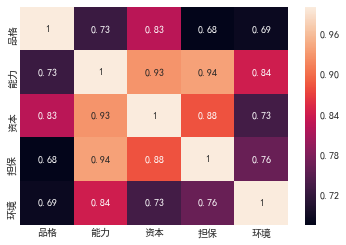

In [6]:
# 求解相关系数矩阵，证明做主成分分析的必要性
## 丢弃无用的 ID 列
data = df.drop(columns='ID')

import seaborn as sns
sns.heatmap(data.corr(), annot=True) 
# annot=True: 显示相关系数矩阵的具体数值
# 发现变量间相关性都比较高，大于 0.7，有做 PCA 的必要

## 数据标准化

In [7]:
# PCA 通常用中心标准化，也就是都转化成 Z 分数的形式
from sklearn.preprocessing import scale
data = scale(data)

## PCA 建模

In [9]:
from sklearn.decomposition import PCA

# 说明：
## 1. 第一次的 n_components 参数最好设置得大一些（保留的主成份）
## 2. 观察 explained_variance_ratio_ 取值变化，即每个主成分能够解释原始数据变异的百分比
pca = PCA(n_components=5) # 直接与变量个数相同的主成分
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## 结果分析

### 累计解释变异程度

In [10]:
pca.explained_variance_ratio_

array([0.84223701, 0.07667191, 0.0594929 , 0.01591189, 0.00568629])

In [11]:
sum(pca.explained_variance_ratio_)

1.0

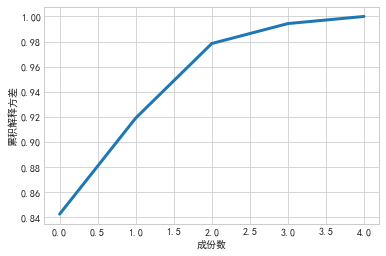

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=3)
plt.xlabel('成份数')
plt.ylabel('累积解释方差'); plt.grid(True)

### 重新建模

In [14]:
# 重新选择主成分个数进行建模
pca = PCA(n_components=1).fit(data)
new_data = pca.fit_transform(data) 
# fit_transform 表示将生成降维后的数据
new_data

array([[ 0.26743703],
       [-0.77517212],
       [ 2.60368412],
       [-0.44020394],
       [-0.67821851],
       [ 1.38993749],
       [ 3.96010211],
       [-1.31085029],
       [-3.53064032],
       [-1.48607556]])

In [15]:
# 查看规模差别
print("原始数据集规模:   ", data.shape)
print("降维后的数据集规模:", new_data.shape)

# 果然由 5 列降到一列
# 原始数据集规模:    (10, 5)
# 降维后的数据集规模: (10, 1)

原始数据集规模:    (10, 5)
降维后的数据集规模: (10, 1)


### 主成分中各变量的权重分析

In [16]:
# 第一个主成分（解释了 84% 的变异的那个）与 5 个 X 的系数关系
pd.DataFrame(pca.components_).T
# 可以理解成：第一主成分 = 0.413*X1 + 0.47*X2 + 0.46*X3 + 0.45*X4 + 0.42*X5
## 所以说生成的主成分除降维意义显著外，并没有什么其他的意义，并不好解释

,0
0,0.413490
1,0.472893
2,0.465599
3,0.454653
4,0.426504


## 做出决策

In [17]:
results = df.join(pd.DataFrame(new_data, columns=['PCA'])) # 与原来的数据拼接
results

,ID,品格,能力,资本,担保,环境,PCA
0,1,76.5,81.5,76.0,75.8,71.7,0.267437
1,2,70.6,73.0,67.6,68.1,78.5,-0.775172
2,3,90.7,87.3,91.0,81.5,80.0,2.603684
3,4,77.5,73.6,70.9,69.8,74.8,-0.440204
4,5,85.6,68.5,70.0,62.2,76.5,-0.678219
5,6,85.0,79.2,80.3,84.4,76.5,1.389937
6,7,94.0,94.0,87.5,89.5,92.0,3.960102
7,8,84.6,66.9,68.8,64.8,66.4,-1.310850
8,9,57.7,60.4,57.4,60.8,65.0,-3.530640
9,10,70.0,69.2,71.7,64.9,68.9,-1.486076


In [13]:
results.sort_values(by='PCA', ascending=False)

,ID,品格,能力,资本,担保,环境,PCA
6,7,94.0,94.0,87.5,89.5,92.0,3.960102
2,3,90.7,87.3,91.0,81.5,80.0,2.603684
5,6,85.0,79.2,80.3,84.4,76.5,1.389937
0,1,76.5,81.5,76.0,75.8,71.7,0.267437
3,4,77.5,73.6,70.9,69.8,74.8,-0.440204
4,5,85.6,68.5,70.0,62.2,76.5,-0.678219
1,2,70.6,73.0,67.6,68.1,78.5,-0.775172
7,8,84.6,66.9,68.8,64.8,66.4,-1.310850
9,10,70.0,69.2,71.7,64.9,68.9,-1.486076
8,9,57.7,60.4,57.4,60.8,65.0,-3.530640


贷款给 7 号客户风险最低，给 9 号客户风险最高